# Recurrent Neural Network (RNN)
## Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:
# Importing the training set
dataset_train = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
training_set_scaled.shape

(3019, 1)

In [5]:
training_set_scaled

array([[0.08415035],
       [0.09539422],
       [0.09649759],
       ...,
       [0.98274539],
       [0.97817429],
       [0.97107069]])

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2919):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(2919, 3019):
    X_test.append(training_set_scaled[i-60:i, 0])
    y_test.append(training_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [7]:
X_train.shape

(2859, 60)

In [8]:
y_train.shape

(2859,)

In [9]:
X_test.shape

(100, 60)

In [10]:
y_test.shape

(100,)

In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
X_train.shape

(2859, 60, 1)

In [13]:
X_test.shape

(100, 60, 1)

## Part 2 - Building the RNN

In [14]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary();

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 60)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 100)           80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)              

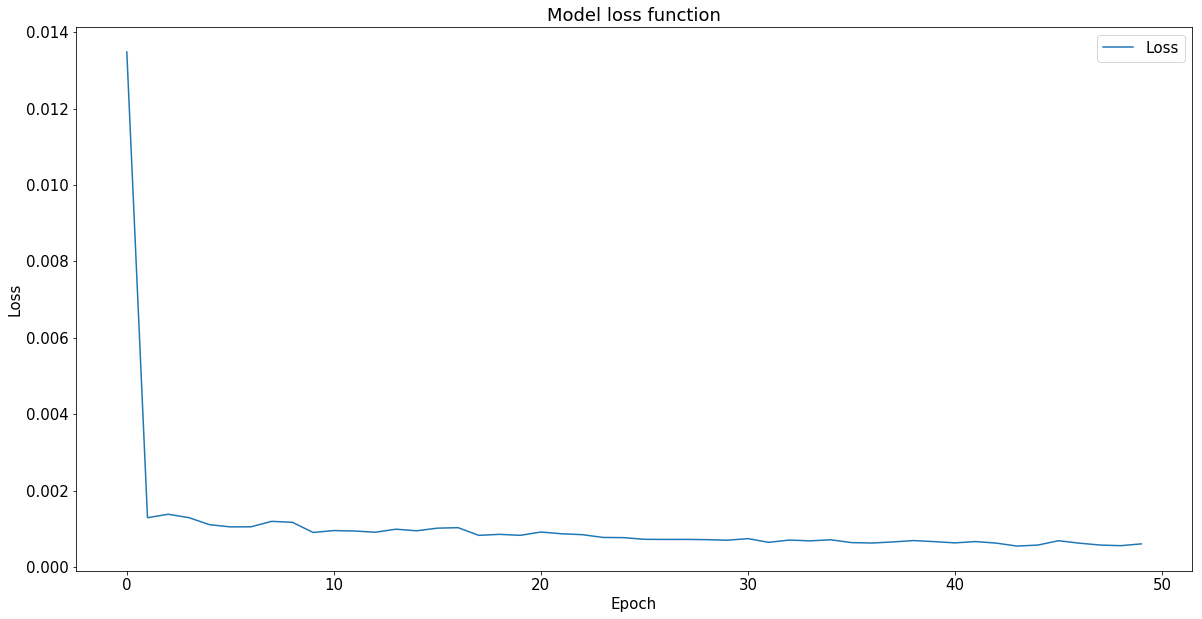

In [16]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':15}
plt.rc('font',**font)
plt.plot(history.history['loss'])
plt.title('Model loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper right')
plt.show()

## Part 3 - Making the predictions

In [17]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [18]:
real_stock_price = training_set[2919:3019:1]

## Part 4 - Visualising the results

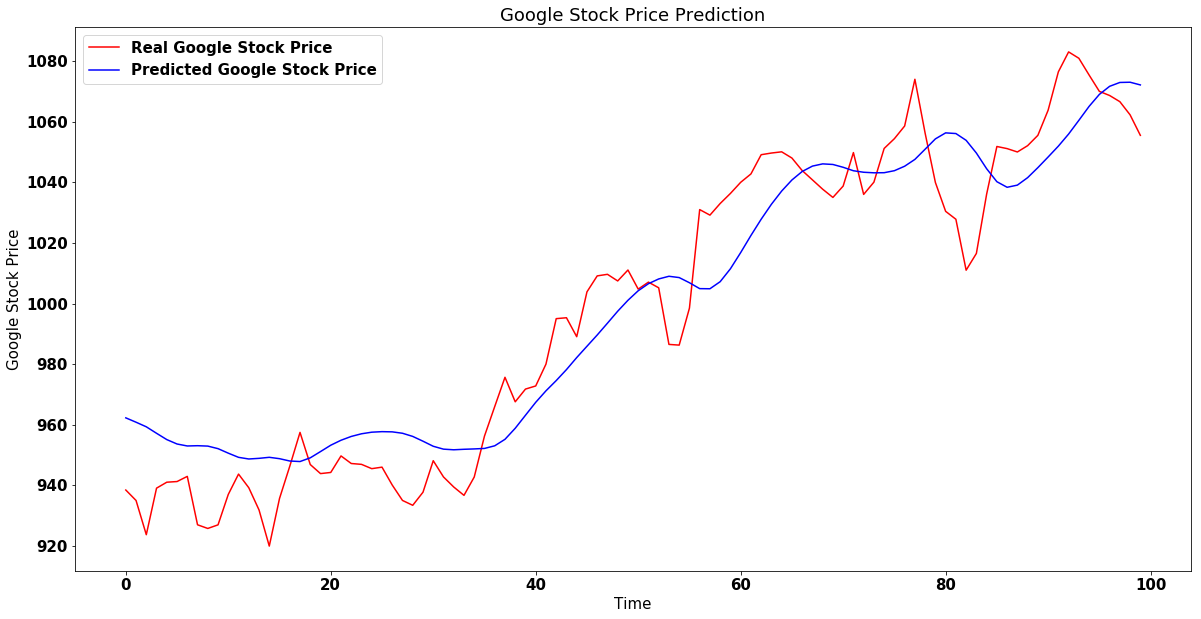

In [19]:
# Visualising the results
plt.rcParams['figure.figsize']=(20,10)
font = {'family':'DejaVu Sans','weight':'bold','size':15}
plt.rc('font',**font)
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Part 5 - Model Performance Evaluation

In [20]:
# Getting predicted stock price trend
trend_prediction = []
X = 0
for i in range(0,99):
  # for upwards trend of price
  if predicted_stock_price[i] < predicted_stock_price[i+1]:
    X = 1
  # for downwards trend of price
  if predicted_stock_price[i] >= predicted_stock_price[i+1]:
    X = 0
  trend_prediction.append(X)

In [21]:
# Getting real stock price trend
trend = []
Y = 0
for i in range(0,99):
  # for upwards trend of price
  if real_stock_price[i] < real_stock_price[i+1]:
    Y = 1
  # for downwards trend of price
  if real_stock_price[i] >= real_stock_price[i+1]:
    Y = 0
  trend.append(Y)

In [22]:
print(confusion_matrix(trend, trend_prediction))

[[17 29]
 [20 33]]


In [23]:
print(accuracy_score(trend, trend_prediction))

0.5050505050505051


In [24]:
print(classification_report(trend, trend_prediction))

              precision    recall  f1-score   support

           0       0.46      0.37      0.41        46
           1       0.53      0.62      0.57        53

   micro avg       0.51      0.51      0.51        99
   macro avg       0.50      0.50      0.49        99
weighted avg       0.50      0.51      0.50        99

